# 📊 Exploratory Data Analysis (EDA) on Global Superstore Dataset
**Objective**: Perform EDA to identify trends, patterns, anomalies, and factors influencing performance.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

## Step 1: Load Dataset

In [4]:
# Make sure Global_Superstore.xlsx is in the same folder
file_path = 'Global_Superstore.xlsx'
df = pd.read_excel(file_path)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,10024.0,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,NaN,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,NaN,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,NaN,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


## Step 2: Data Overview

In [5]:
print("Initial shape:", df.shape)
df.info()

Initial shape: (51290, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-n

## Step 3: Handle Missing Values

In [7]:
df['Postal Code'] = df['Postal Code'].fillna(df['Postal Code'].median())

df.dropna(subset=['Sales', 'Profit'], inplace=True)

## Step 4: Remove Duplicates

In [8]:
df.drop_duplicates(inplace=True)
print("Duplicates removed.")

Duplicates removed.


## Step 5: Handle Outliers using IQR

In [9]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

df = remove_outliers_iqr(df, 'Sales')
df = remove_outliers_iqr(df, 'Profit')

## Step 6: Descriptive Statistics

In [10]:
df[['Sales', 'Profit', 'Discount', 'Quantity']].describe()

,Sales,Profit,Discount,Quantity
count,37703.000000,37703.000000,37703.000000,37703.000000
mean,88.494541,10.755792,0.128470,3.095297
std,100.037706,19.514843,0.201124,2.021151
min,0.444000,-40.020000,0.000000,1.000000
25%,22.620000,0.771600,0.000000,2.000000
50%,51.312000,7.200000,0.000000,3.000000
75%,114.390000,20.158400,0.200000,4.000000
max,581.250000,66.660000,0.800000,14.000000


## Step 7: Correlation Matrix

In [11]:
correlation = df[['Sales', 'Profit', 'Discount', 'Quantity']].corr()
correlation

,Sales,Profit,Discount,Quantity
Sales,1.000000,0.400584,-0.173398,0.236746
Profit,0.400584,1.000000,-0.540408,0.155049
Discount,-0.173398,-0.540408,1.000000,-0.026605
Quantity,0.236746,0.155049,-0.026605,1.000000


## Step 8: Visualizations
### Histogram - Sales

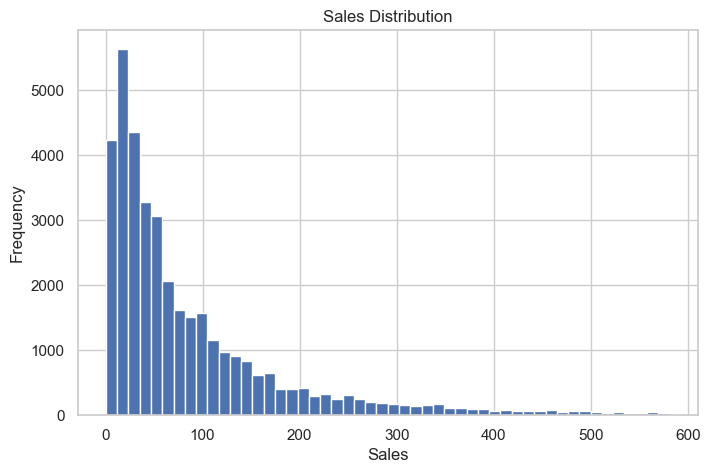

In [12]:
plt.figure(figsize=(8,5))
df['Sales'].hist(bins=50)
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

### Boxplot - Profit

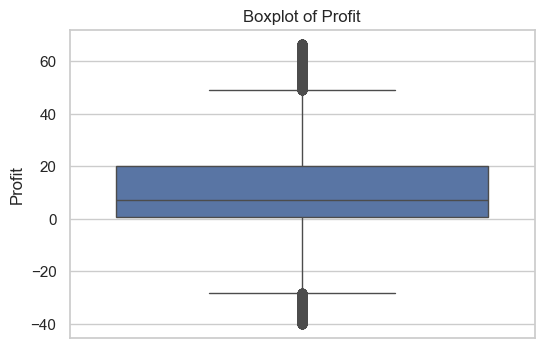

In [13]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df['Profit'])
plt.title("Boxplot of Profit")
plt.show()

### Heatmap - Correlation Matrix

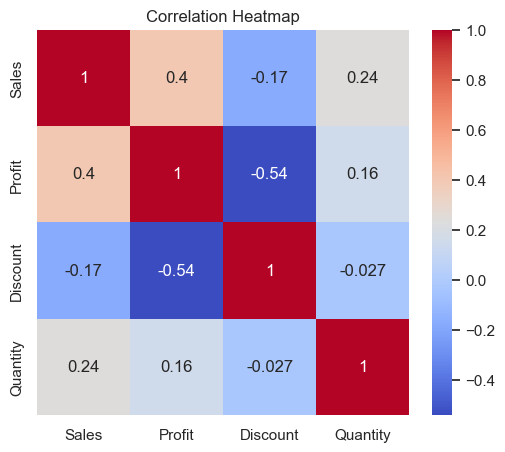

In [14]:
plt.figure(figsize=(6,5))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### Sales by Region

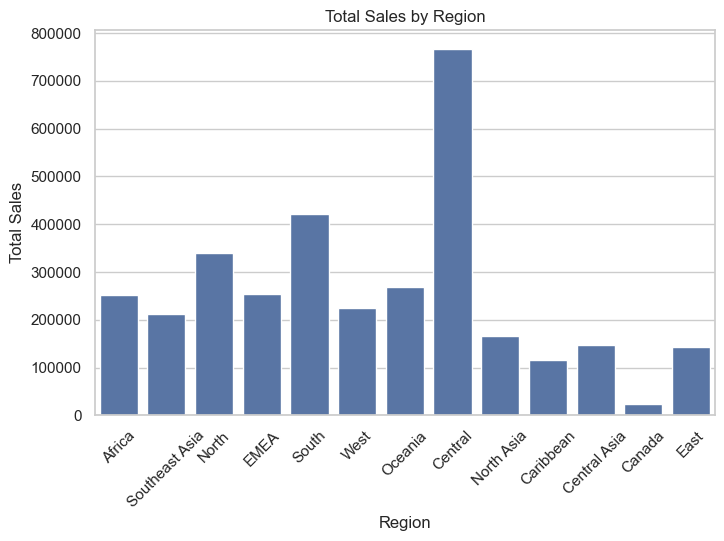

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Region', y='Sales', estimator=sum, errorbar=None)
plt.title("Total Sales by Region")
plt.xticks(rotation=45)
plt.ylabel("Total Sales")
plt.show()

### Sales by Category

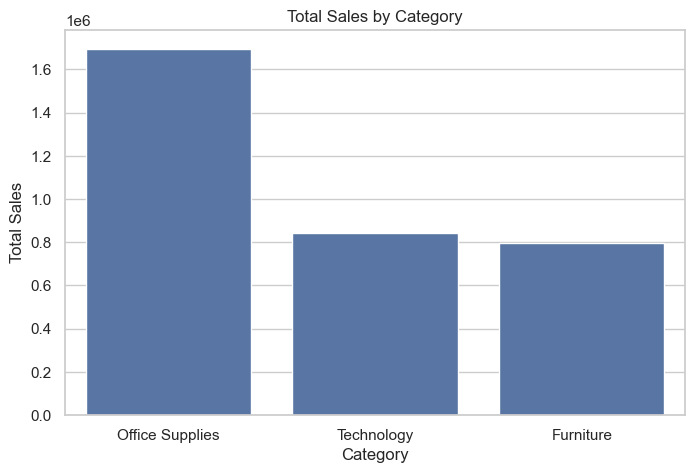

In [18]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Category', y='Sales', estimator=sum, errorbar=None)
plt.title("Total Sales by Category")
plt.ylabel("Total Sales")
plt.show()

## Step 9: Save Cleaned Dataset

In [19]:
df.to_csv('Cleaned_Global_Superstore.csv', index=False)
print("Cleaned dataset saved as 'Cleaned_Global_Superstore.csv'")

Cleaned dataset saved as 'Cleaned_Global_Superstore.csv'
